<a href="https://colab.research.google.com/github/mixxung/ICT/blob/main/helmet_AE_anomalydetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving helmet_1.zip to helmet_1.zip
User uploaded file "helmet_1.zip" with length 3153075 bytes


In [3]:
# Anomaly data_1000
from google.colab import files 

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data_1000.zip to data_1000.zip
User uploaded file "data_1000.zip" with length 1196464 bytes


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! mkdir helmet_1                      # 마운트에 폴더 생성
! unzip helmet_1.zip -d ./helmet_1   # unzip 

Archive:  helmet_1.zip
  inflating: ./helmet_1/10.JPG       
  inflating: ./helmet_1/100.JPG      
  inflating: ./helmet_1/101.JPG      
  inflating: ./helmet_1/102.JPG      
  inflating: ./helmet_1/103.JPG      
  inflating: ./helmet_1/104.JPG      
  inflating: ./helmet_1/105.JPG      
  inflating: ./helmet_1/106.JPG      
  inflating: ./helmet_1/107.JPG      
  inflating: ./helmet_1/108.JPG      
  inflating: ./helmet_1/109.JPG      
  inflating: ./helmet_1/11.JPG       
  inflating: ./helmet_1/110.JPG      
  inflating: ./helmet_1/111.JPG      
  inflating: ./helmet_1/112.JPG      
  inflating: ./helmet_1/113.JPG      
  inflating: ./helmet_1/114.JPG      
  inflating: ./helmet_1/115.JPG      
  inflating: ./helmet_1/116.JPG      
  inflating: ./helmet_1/117.JPG      
  inflating: ./helmet_1/119.JPG      
  inflating: ./helmet_1/12.JPG       
  inflating: ./helmet_1/120.JPG      
  inflating: ./helmet_1/121.JPG      
  inflating: ./helmet_1/122.JPG      
  inflating: ./helmet_1/123

In [6]:
! mkdir data_1000                      # 마운트에 폴더 생성
! unzip data_1000.zip -d ./data_1000  # unzip 

Archive:  data_1000.zip
 extracting: ./data_1000/35.4527.jpg  
 extracting: ./data_1000/35.4561.jpg  
 extracting: ./data_1000/35.4579.jpg  
 extracting: ./data_1000/35.4595.jpg  
 extracting: ./data_1000/35.4617.jpg  
 extracting: ./data_1000/35.4625.jpg  
 extracting: ./data_1000/35.4637.jpg  
 extracting: ./data_1000/35.4644.jpg  
 extracting: ./data_1000/35.4668.jpg  
 extracting: ./data_1000/35.4674.jpg  
 extracting: ./data_1000/35.4681.jpg  
 extracting: ./data_1000/35.4754.jpg  
 extracting: ./data_1000/35.4787.jpg  
 extracting: ./data_1000/35.4796.jpg  
 extracting: ./data_1000/35.4853.jpg  
 extracting: ./data_1000/35.4893.jpg  
 extracting: ./data_1000/35.4994.jpg  
 extracting: ./data_1000/35.5084.jpg  
 extracting: ./data_1000/35.5102.jpg  
 extracting: ./data_1000/35.5113.jpg  
 extracting: ./data_1000/35.5141.jpg  
 extracting: ./data_1000/35.5254.jpg  
 extracting: ./data_1000/35.5281.jpg  
 extracting: ./data_1000/35.5315.jpg  
 extracting: ./data_1000/35.5316.jpg  
 

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

import cv2 
import torch
import torchvision
from torchvision import transforms # 이미지 데이터 transform
from torch.utils.data import DataLoader # 이미지 데이터 로더
import glob

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [9]:
# 경로 지정

helmet_path = './helmet_1'
Nohelmet_path = './data_1000'

helmet_dir = './helmet_1'
nohelmet_dir = './data_1000'

In [10]:
resize_trans = transforms.Compose([
                                   transforms.Resize((128,128)),
                                   transforms.ToTensor()
])

resize_helmet = torchvision.datasets.ImageFolder(root=helmet_path, transform=resize_trans)
resize_Nohelmet = torchvision.datasets.ImageFolder(root=Nohelmet_path, transform=resize_trans)

FileNotFoundError: ignored

In [11]:
width = 128
height = 128
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2) 

In [35]:
X_train = datagen.flow_from_directory(directory='/content/helmet_1',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

X_test = datagen.flow_from_directory(directory='/content/helmet_1',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')
#파일을 두개 헬멧 0, 헬멧 X - 라벨링을 폴더로 대신함

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [17]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

In [19]:
print(tf.__version__)     # 텐서플로우 버전확인 (colab의 기본버전은 1.15.0) --> 2.0 변경 "%tensorflow_version 2.x"
print(keras.__version__)

2.8.2
2.8.0


In [15]:
def AE():
    ## Encoder 구간
    model = tf.keras.Sequential()
    model.add(Dense(256, input_shape=(56*56,)))  # 입력계층
    model.add(Activation('relu'))      

    model.add(Dense(128))                       # 은닉계층
    model.add(Activation('relu'))

    ## Decoder 구간
    model.add(Dense(128))                        # 은닉계층
    model.add(Activation('relu'))

    model.add(Dense(56*56))                # 출력계층
    model.add(Activation('linear'))

    return model

In [18]:
# model 함수 실행
model = AE()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               803072    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 3136)             

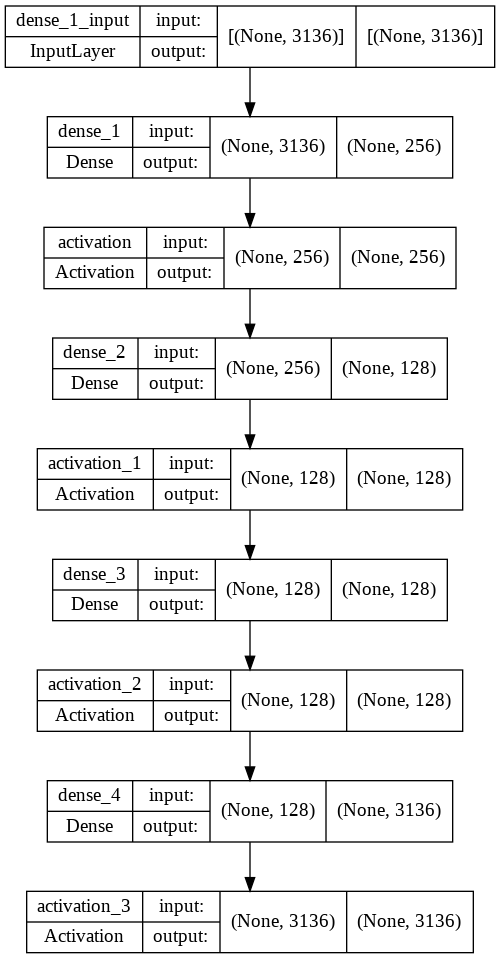

In [20]:
# 위에서 정한 모델을 그림으로(plot) 보여줌
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

**Training**

In [36]:
# 모델 구조 확정하고 컴파일 진행
model.compile(loss='MSE',                   # MSE : mean square error
              optimizer='adam',                 
              metrics=[ 'mae' ])            # MAE : mean absolute  error  

# model.fit을 써서 학습. 학습과정을 history에 저장
history = model.fit(X_train, X_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, X_test),
                    shuffle=True)

ValueError: ignored

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os 

# 압축해제된 데이터 경로를 찾아 복사해서 붙여넣어주세요
src = '/content/helmet_1/'

# 이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file, cv.IMREAD_ANYCOLOR)
    return img

# src 경로에 있는 파일 명을 저장합니다. 
files = os.listdir(src)

X = []
Y = []

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 

for file in files: 
    X.append(img_read(src,file)/255.)
    Y.append(1) # nomal label : 1


# array로 데이터 변환
X = np.array(X)
Y = np.array(Y)

print('Normal shape:',np.shape(X))
X[0].shape

FileNotFoundError: ignored

In [42]:
image = cv2.imread("/content/helmet_1/10.JPG", cv2.IMREAD_ANYCOLOR)

In [63]:
import sklearn
from sklearn.model_selection import train_test_split

# Train set, Test set으로 나누기 
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.2, random_state=1,shuffle=True)
print(X_train, X_test, Y_train, Y_test)
# 형태를 3차원에서 2차원으로 변경, 첫 번째 인덱스 : 이미지 수, 두 번쨰 인덱스 : 2차원 이미지를 1차원으로 변경 후의 길이
'''
X_train= np.array(X_train, dtype=np.float64)
X_test=np.array(X_test, dtype=np.float64)
Y_train=np.array(Y_train, dtype=np.float64)
Y_test=np.array(Y_test, dtype=np.float64)
'''
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(np.shape(X_train))
print(np.shape(X_test))

[array([[[0.95294118, 0.92156863, 0.92156863],
         [0.95294118, 0.92156863, 0.92156863],
         [0.95294118, 0.92156863, 0.92156863],
         ...,
         [0.97254902, 0.95294118, 0.94901961],
         [0.97254902, 0.95294118, 0.94901961],
         [0.97254902, 0.95294118, 0.94901961]],

        [[0.95294118, 0.92156863, 0.92156863],
         [0.95294118, 0.92156863, 0.92156863],
         [0.95294118, 0.92156863, 0.92156863],
         ...,
         [0.97254902, 0.95294118, 0.94901961],
         [0.97254902, 0.95294118, 0.94901961],
         [0.97254902, 0.95294118, 0.94901961]],

        [[0.95294118, 0.92156863, 0.92156863],
         [0.95294118, 0.92156863, 0.92156863],
         [0.95294118, 0.92156863, 0.92156863],
         ...,
         [0.97254902, 0.95294118, 0.94901961],
         [0.97254902, 0.95294118, 0.94901961],
         [0.97254902, 0.95294118, 0.94901961]],

        ...,

        [[0.08235294, 0.1372549 , 0.21176471],
         [0.10588235, 0.15686275, 0.24313725]

TypeError: ignored

In [43]:
image

array([[[ 84,  56, 255],
        [ 84,  56, 255],
        [ 84,  56, 255],
        ...,
        [ 87,  61, 255],
        [ 87,  61, 255],
        [ 87,  61, 255]],

       [[ 84,  56, 255],
        [ 84,  56, 255],
        [ 84,  56, 255],
        ...,
        [ 87,  61, 255],
        [ 87,  61, 255],
        [ 87,  61, 255]],

       [[ 84,  56, 255],
        [ 84,  56, 255],
        [ 83,  55, 255],
        ...,
        [ 87,  61, 255],
        [ 87,  61, 255],
        [ 87,  61, 255]],

       ...,

       [[ 91,  65, 255],
        [ 91,  65, 255],
        [ 91,  65, 255],
        ...,
        [ 99,  77, 255],
        [ 99,  77, 255],
        [ 99,  77, 255]],

       [[ 91,  65, 255],
        [ 91,  65, 255],
        [ 91,  65, 255],
        ...,
        [ 99,  77, 255],
        [ 99,  77, 255],
        [ 99,  77, 255]],

       [[ 91,  65, 255],
        [ 91,  65, 255],
        [ 91,  65, 255],
        ...,
        [ 99,  77, 255],
        [ 99,  77, 255],
        [ 99,  77, 255]]

**Anomaly(data_1000) unzip**

In [27]:
# 압축해제된 데이터 경로를 찾아 복사해서 붙여넣어주세요
src = './data_1000/'

# 이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file,cv.COLOR_BGR2GRAY)
    return img

# src 경로에 있는 파일 명을 저장합니다. 
files = os.listdir(src)

ANom = []
ANom_Y = []

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 
for file in files: 
    ANom.append(img_read(src,file)/255.)
    ANom_Y.append(0) # Anomal label : 0

# array로 데이터 변환
ANom = np.array(ANom)
ANom_Y = np.array(ANom_Y)
print('Anomaly shape:', np.shape(ANom_Y))

# 형태를 3차원에서 2차원으로 변경, 첫 번째 인덱스 : 이미지 수, 두 번쨰 인덱스 : 2차원 이미지를 1차원으로 변경 후의 길이
ANom_images = ANom.reshape((len(ANom), np.prod(ANom.shape[1:])))
print(np.shape(ANom_images))

Anomaly shape: (1000,)
(1000, 3136)


In [28]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

In [29]:
print(tf.__version__)     # 텐서플로우 버전확인 (colab의 기본버전은 1.15.0) --> 2.0 변경 "%tensorflow_version 2.x"
print(keras.__version__)

2.8.2
2.8.0


# Autoencoder model

In [30]:
def AE():
    ## Encoder 구간
    model = tf.keras.Sequential()
    model.add(Dense(256, input_shape=(56*56,)))  # 입력계층
    model.add(Activation('relu'))      

    model.add(Dense(128))                       # 은닉계층
    model.add(Activation('relu'))

    ## Decoder 구간
    model.add(Dense(128))                        # 은닉계층
    model.add(Activation('relu'))

    model.add(Dense(56*56))                # 출력계층
    model.add(Activation('linear'))

    return model

In [31]:
# model 함수 실행
model = AE()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               803072    
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 activation_5 (Activation)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 activation_6 (Activation)   (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 3136)             

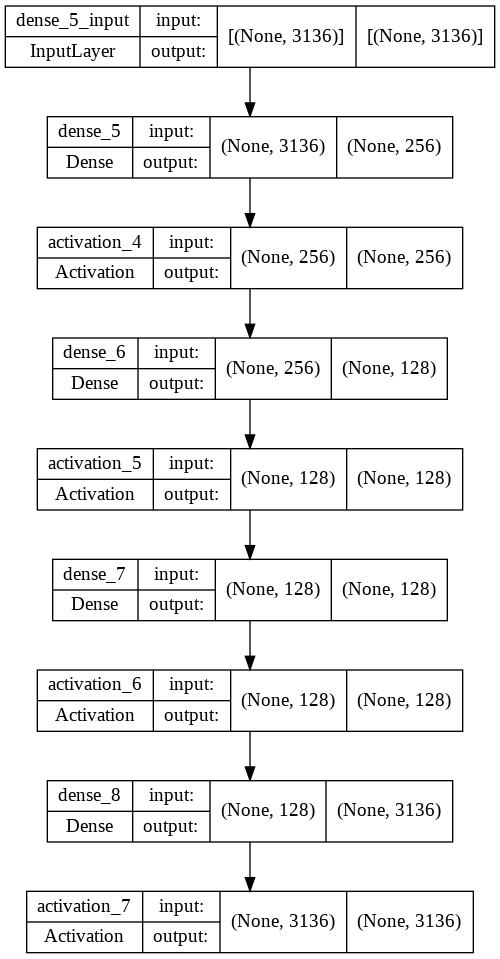

In [32]:
# 위에서 정한 모델을 그림으로(plot) 보여줌
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True) 

**Training**

In [33]:
# 모델 구조 확정하고 컴파일 진행
model.compile(loss='MSE',                   # MSE : mean square error
              optimizer='adam',                 
              metrics=[ 'mae' ])            # MAE : mean absolute  error  

# model.fit을 써서 학습. 학습과정을 history에 저장
history = model.fit(X_train, X_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, X_test),
                    shuffle=True)

NameError: ignored

**Normal data 복원 확인** 

1.   항목 추가
2.   항목 추가



In [34]:
test_score = model.evaluate(X_test, X_test, verbose=0) # loss 값 결과 확인
print('Normal Test data cost = ', '{:.4f}'.format(test_score[0]))

sample_size = 10                        # 보여줄 sample 갯수 설정
prediction1 = model.predict(X_test)      # test 데이터로 이미지 복원(predict 함수 사용)

# plot 하기
fig, ax = plt.subplots(2, sample_size, figsize=(15, 4))
for i in range(sample_size):
  org_img1 = X_test[i].reshape(56,56)
  rec_img1 = prediction1[i].reshape(56,56)
  
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  
  ax[0][i].imshow(org_img1, cmap=plt.cm.bone)
  ax[1][i].imshow(rec_img1, cmap=plt.cm.bone)

plt.show()

NameError: ignored

**Abnormal data 복원 확인 (data_1000)**



Abnormal Testing data cost =  0.4121


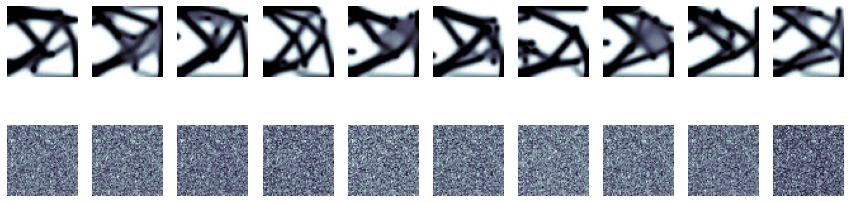

In [ ]:
ANom_score = model.evaluate(ANom_images, ANom_images, verbose=0) # loss 값 결과 확인
print('Abnormal Testing data cost = ', '{:.4f}'.format(ANom_score[0]))

sample_size = 10                        # 보여줄 sample 갯수 설정
prediction2 = model.predict(ANom_images)      # test 데이터로 이미지 복원(predict 함수 사용)

# plot 하기
fig, ax = plt.subplots(2, sample_size, figsize=(15, 4))
for i in range(sample_size):
  org_img2 = ANom_images[i].reshape(56,56)
  rec_img2 = prediction2[i].reshape(56,56)
  
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  
  ax[0][i].imshow(org_img2, cmap=plt.cm.bone)
  ax[1][i].imshow(rec_img2, cmap=plt.cm.bone)

plt.show()

Test_data & data_1000 예측값(y_pred) 구하기 (AE 통과하기)

1. data_3000과 data_1000의 이미지 별 loss(MSE) 구하기
2. 둘을 비교하여 (히스토그램) 임계값 설정

In [ ]:
import pandas as pd # pandas 라이브러리

# Normal data (data_3000)
Nom_data = np.concatenate((X_test, X_train), axis = 0)
Nom_pred = model.predict(Nom_data) # AE 이미지 결과값 
Nom_pred_mse = np.mean(np.power(Nom_data - Nom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Normal Metric')
Nom_pred_mse_df = pd.DataFrame({'Normal_mse':Nom_pred_mse})
print(Nom_pred_mse_df.describe())

print('\n')

# Abnormal data (data_1000)
ANom_pred = model.predict(ANom_images) # AE 이미지 결과값 
ANom_pred_mse = np.mean(np.power(ANom_images - ANom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Anomaly Metric')
ANom_pred_mse_df = pd.DataFrame({'Anomaly_mse':ANom_pred_mse})
print(ANom_pred_mse_df.describe())

# 히스토그램 그리기
print('\n')
plt.figure()
plt.title('MSE Histogram') # 그림 이름 설정 
plt.hist(Nom_pred_mse, bins=10, facecolor='blue', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.hist(ANom_pred_mse, bins=10, facecolor='red', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.show()

비교 가능하도록 데이터 설정 (data_3000 중 20%의 x_test + data_1000)

In [ ]:
test_data = np.concatenate((X_test, ANom_images), axis = 0)
y_true = np.concatenate((Y_test, ANom_Y), axis = 0)

print(np.shape(test_data))
print(np.shape(y_true))